In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("h1n1_vaccine_prediction.csv")
data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [3]:
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [4]:
data.shape

(26707, 34)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [7]:
#missing value treatment
for i in data.columns:
    if(data[i].isnull().sum())>0:
        data[i].fillna(data[i].mode()[0],inplace=True)

if the percentage of missing value more than 70% than we need to drop the rntire column otherwise we impute it

In [8]:
data['h1n1_worry'].mode()[0]

2.0

 ### 1.Exploratory Data Analysis

In [9]:
v=data['h1n1_vaccine'].value_counts()
v

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

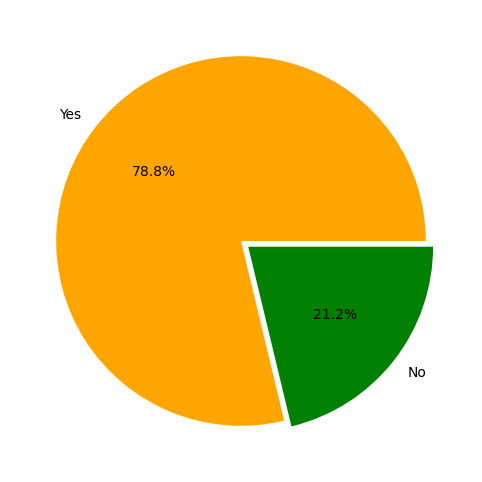

In [10]:
plt.figure(figsize=(10,6))
labels=['Yes','No']
explode=[.0,.05]
mycolors=['Orange','Green']
sizes=data['h1n1_vaccine'].value_counts().values
plt.pie(sizes,explode=explode,labels=labels,colors=mycolors,autopct="%1.1f%%")
plt.show()

Based on my hypothesis the race, income level, housing_status,marital_status, no_of_adults, no_of_children features are not important

In [11]:
## Lets check the string values
data_obj=data.select_dtypes(include=np.object_)
data_obj

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [12]:
data_obj.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [13]:
### label endcoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa']
for i in cols:
    data[i]=le.fit_transform(data[i])

      

In [14]:
data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,1,0,1,1,0,1,1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,3,0,0,1,0,0,0,0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,0,2,1.0,0.0,0



### Checking our Hypothesis

In [15]:
data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,1,0,1,1,0,1,1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,3,0,0,1,0,0,0,0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,0,2,1.0,0.0,0


In [16]:
l1 = ['marital_status','sex','race','age_bracket','housing_status','unique_id','contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','qualification','avoid_touch_face']
for i in l1:
    data =  data.drop(columns=i)


In [17]:
from sklearn.feature_selection import chi2
x1=data.drop('h1n1_vaccine',axis=1)
y1=data.h1n1_vaccine

In [18]:
fscore=chi2(x1,y1)
fscore

(array([2.01358892e+02, 1.11808117e+02, 4.11096977e+01, 8.64154522e+00,
        3.30781019e+03, 8.92499456e+02, 1.72886102e+02, 1.09342915e+02,
        6.72405011e+02, 3.04643931e+00, 4.95639893e+02, 1.91415123e+03,
        1.15654361e+02, 2.43320341e+02, 1.22231992e+03, 2.01581768e+00,
        1.28867110e+01, 2.49155964e+00, 3.83927863e-03, 9.07646362e-01,
        2.84434376e-01]),
 array([1.05510630e-045, 3.93620890e-026, 1.43920477e-010, 3.28582623e-003,
        0.00000000e+000, 4.19137320e-196, 1.73317808e-039, 1.36504702e-025,
        2.99632034e-148, 8.09143610e-002, 8.44597327e-110, 0.00000000e+000,
        5.65791678e-027, 7.42579815e-055, 8.60189894e-268, 1.55667387e-001,
        3.30923476e-004, 1.14458249e-001, 9.50593163e-001, 3.40739680e-001,
        5.93809390e-001]))

In [19]:
p_value=pd.Series(fscore[1],index=x1.columns)

In [20]:
irrs_col=[]
for x in p_value.index:
    if p_value[x]<=0.05:
        print(x,":-Reject Null Hypothesis")
    else:
         print(x,":-Accept Null Hypothesis")
         irrs_col.append(x)
        

h1n1_worry :-Reject Null Hypothesis
h1n1_awareness :-Reject Null Hypothesis
antiviral_medication :-Reject Null Hypothesis
reduced_outside_home_cont :-Reject Null Hypothesis
dr_recc_h1n1_vacc :-Reject Null Hypothesis
dr_recc_seasonal_vacc :-Reject Null Hypothesis
chronic_medic_condition :-Reject Null Hypothesis
cont_child_undr_6_mnths :-Reject Null Hypothesis
is_health_worker :-Reject Null Hypothesis
has_health_insur :-Accept Null Hypothesis
is_h1n1_vacc_effective :-Reject Null Hypothesis
is_h1n1_risky :-Reject Null Hypothesis
sick_from_h1n1_vacc :-Reject Null Hypothesis
is_seas_vacc_effective :-Reject Null Hypothesis
is_seas_risky :-Reject Null Hypothesis
sick_from_seas_vacc :-Accept Null Hypothesis
income_level :-Reject Null Hypothesis
employment :-Accept Null Hypothesis
census_msa :-Accept Null Hypothesis
no_of_adults :-Accept Null Hypothesis
no_of_children :-Accept Null Hypothesis


In [21]:
data.drop(irrs_col,axis=1,inplace=True)
data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,reduced_outside_home_cont,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,income_level,h1n1_vaccine
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2,0
1,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,2,0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,0,0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,2,0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,0,0


### Analzing the data

<Axes: xlabel='h1n1_awareness', ylabel='count'>

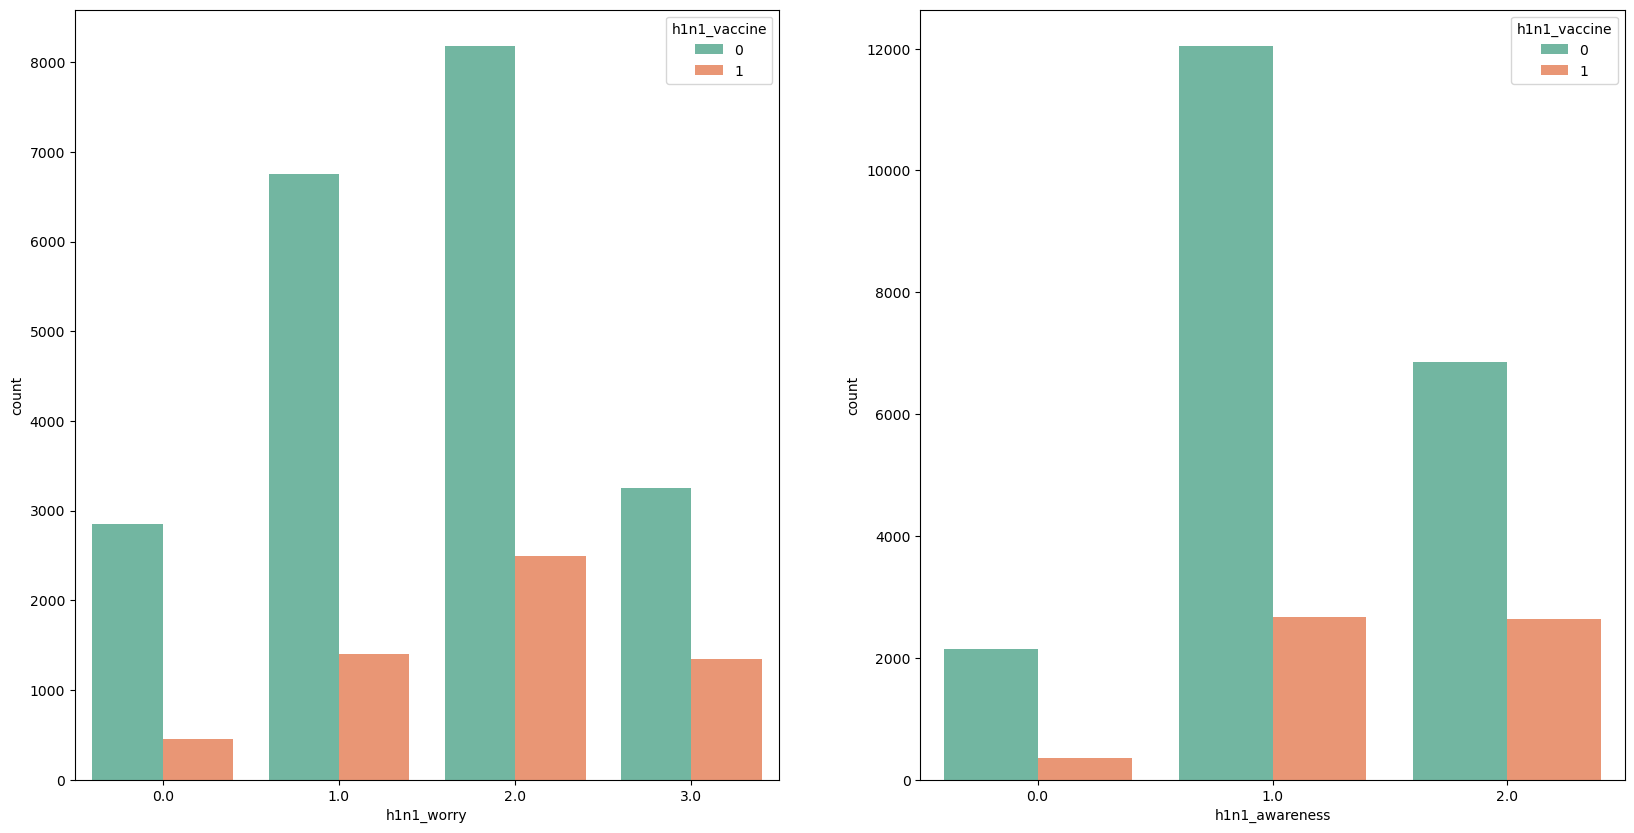

In [22]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='h1n1_worry',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[0])
sns.countplot(x='h1n1_awareness',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[1])

1.In first plot we can observed that people who are somewhat worried or worried are likely to take h1n1_vaccine

2.In second plot we can observed that most people are not aware of h1n1 vaccine so awareness has highly impact to take vaccine

In [23]:
x=data.drop(columns=['h1n1_vaccine'])
y=data['h1n1_vaccine']

### Balancing the data using SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=23)
x_sm,y_sm = sm.fit_resample(x,y)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm, test_size=0.20,random_state=355)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [28]:
val=log_reg.coef_
val

array([[-0.05316043,  0.18574013, -0.08667448, -0.20886118,  2.28679359,
        -0.67648121,  0.07294191, -0.04628392,  0.66915168,  0.60163898,
         0.35978983, -0.05788416,  0.12696661,  0.15089467, -0.22702732]])

In [29]:
y_pred=log_reg.predict(x_test)

In [30]:
y_test

26812    1
39175    1
39929    1
35515    1
28962    1
        ..
7455     0
33482    1
6246     0
8468     0
28961    1
Name: h1n1_vaccine, Length: 8414, dtype: int64

In [31]:
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

75.5288804373663

In [32]:
# area under curve
auc=roc_auc_score(y_test,y_pred)*100
auc

75.58401745138974

In [33]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[3264, 1186],
       [ 873, 3091]], dtype=int64)

In [34]:
from sklearn.metrics import recall_score

In [35]:
precision_score(y_test,y_pred)*100

77.97679112008072

In [36]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)*100

75.0151680621284

In [37]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

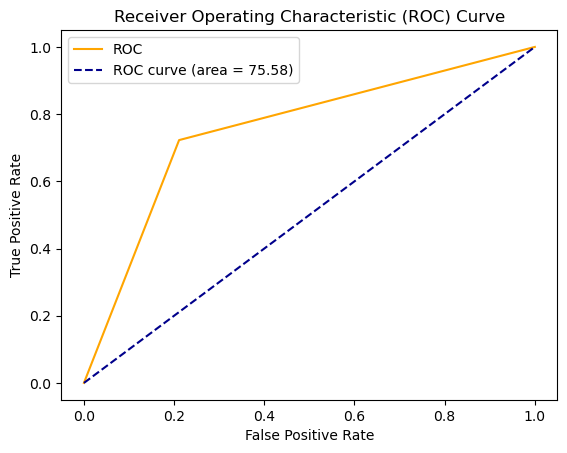

In [38]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Text(120.72222222222221, 0.5, 'truth')

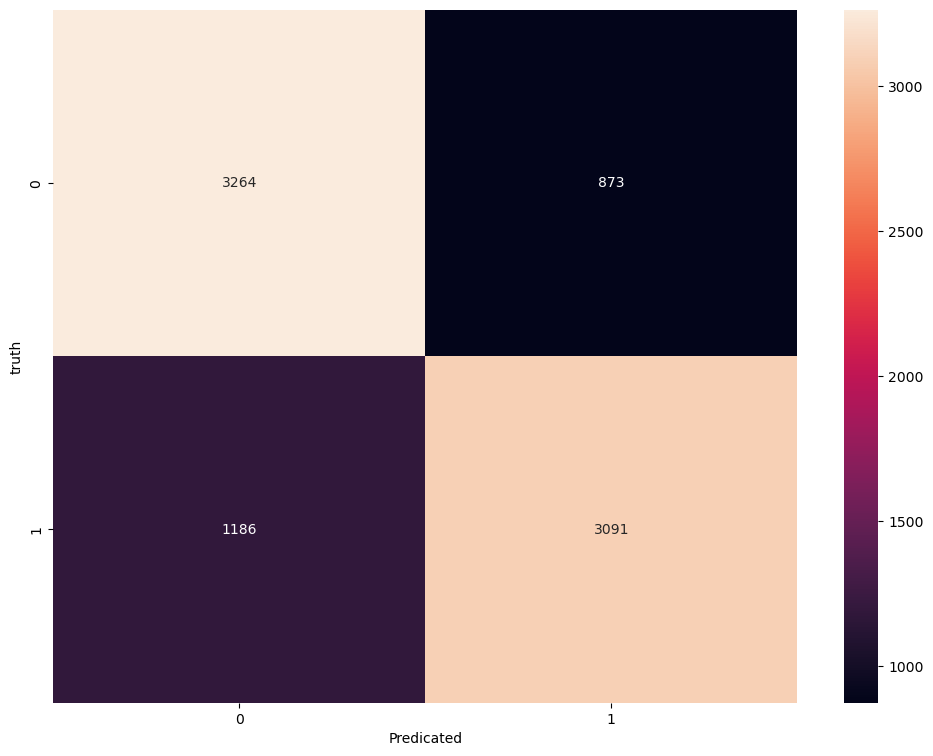

In [39]:
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(12,9))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicated')
plt.ylabel('truth')

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=[variance_inflation_factor(x.values,i)
          for i in range(len(x.columns))]

In [41]:
vif_data

[5.676898913550627,
 4.930734778814339,
 1.083293402217952,
 1.654243842210708,
 2.0766828541659073,
 2.3856343551299206,
 1.4703994693106432,
 1.105890437413795,
 1.1847299043592685,
 17.730807776804237,
 7.363105270918798,
 4.6992680093046175,
 17.89385847915808,
 8.070402622286473,
 1.4693112431371993]

In [42]:
corr=data.corr()
corr

,h1n1_worry,h1n1_awareness,antiviral_medication,reduced_outside_home_cont,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,income_level,h1n1_vaccine
h1n1_worry,1.000000,0.060828,0.089866,0.245404,0.136957,0.120670,0.092249,0.048400,0.032734,0.235841,0.372716,0.355637,0.231649,0.327986,0.046844,0.121574
h1n1_awareness,0.060828,1.000000,-0.010450,-0.066479,0.094135,0.074376,-0.011653,0.025971,0.171516,0.119010,0.074394,-0.017038,0.085281,0.081156,-0.018002,0.117771
antiviral_medication,0.089866,-0.010450,1.000000,0.127204,0.050882,0.031682,0.004637,0.026183,0.007145,0.030172,0.102553,0.076930,0.014498,0.081503,0.061054,0.040226
reduced_outside_home_cont,0.245404,-0.066479,0.127204,1.000000,0.067136,0.081252,0.093675,0.016657,-0.035128,0.050866,0.123348,0.171669,0.066861,0.117428,0.034265,0.022080
dr_recc_h1n1_vacc,0.136957,0.094135,0.050882,0.067136,1.000000,0.603152,0.152020,0.078306,0.098237,0.150546,0.247630,0.106671,0.103365,0.193956,0.027327,0.394086
dr_recc_seasonal_vacc,0.120670,0.074376,0.031682,0.081252,0.603152,1.000000,0.203121,0.038741,0.058775,0.119691,0.156752,0.062781,0.171801,0.228514,-0.006633,0.218976
chronic_medic_condition,0.092249,-0.011653,0.004637,0.093675,0.152020,0.203121,1.000000,0.003533,-0.019810,0.046389,0.121849,0.082861,0.093160,0.166381,0.005609,0.094360
cont_child_undr_6_mnths,0.048400,0.025971,0.026183,0.016657,0.078306,0.038741,0.003533,1.000000,0.082023,0.008373,0.087016,0.038295,0.005304,0.053479,0.043192,0.066712
is_health_worker,0.032734,0.171516,0.007145,-0.035128,0.098237,0.058775,-0.019810,0.082023,1.000000,0.054362,0.124095,0.010536,0.032069,0.092542,0.010994,0.168056
is_h1n1_vacc_effective,0.235841,0.119010,0.030172,0.050866,0.150546,0.119691,0.046389,0.008373,0.054362,1.000000,0.259813,0.061805,0.469367,0.256131,0.041421,0.267352


In [43]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_score

accuracy = accuracy_score(y_test, y_pred)*100
roc_auc_score = roc_auc_score(y_test, y_pred)*100
precision_score = precision_score(y_test, y_pred)*100
f1score = f1_score(y_test, y_pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"precision_score = {precision_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 75.5289
roc_auc_score = 75.584
precision_score = 77.9768
F1 Score = 75.0152
